# Round 3 IMC Prosperity

## Manual Trading

Require a simulation for profit.

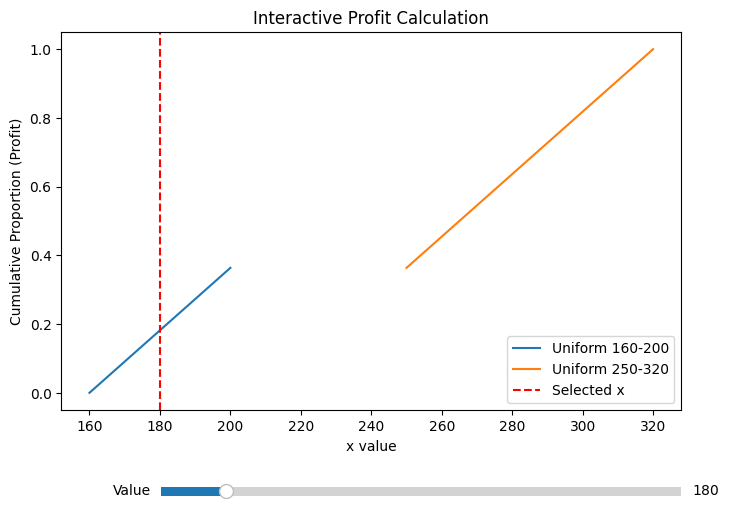

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define the cumulative proportion ("profit") function.
def profit(x):
    if x < 160:
        return 0
    elif x <= 200:
        # Uniform region from 160 to 200.
        return (x - 160) / 110
    elif x < 250:
        # In the gap between 200 and 250, no additional population.
        return 40 / 110
    elif x <= 320:
        # Uniform region from 250 to 320.
        return (40 + (x - 250)) / 110
    else:
        return 1

# Prepare data for the two uniform segments.
x1 = np.linspace(160, 200, 200)
y1 = np.array([profit(x) for x in x1])
x2 = np.linspace(250, 320, 200)
y2 = np.array([profit(x) for x in x2])

# Create the plot.
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)

# Plot the two segments.
line1, = ax.plot(x1, y1, label='Uniform 160-200')
line2, = ax.plot(x2, y2, label='Uniform 250-320')

# Plot a vertical line to indicate the selected x value.
x_init = 180  # initial slider value
slider_line = ax.axvline(x_init, color='red', linestyle='--', label='Selected x')

# Display the current x value and profit on the plot.
profit_text = ax.text(0.05, 0.95, '',
                       transform=ax.transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlabel('x value')
ax.set_ylabel('Cumulative Proportion (Profit)')
ax.set_title('Interactive Profit Calculation')
ax.legend()

# Set up the slider axis and widget.
slider_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(slider_ax, 'Value', 160, 320, valinit=x_init, valstep=0.1)

# Define the update function that recalculates profit and updates the plot.
def update(val):
    x_val = slider.val
    p = profit(x_val)
    slider_line.set_xdata(x_val)
    profit_text.set_text(f'x = {x_val:.1f}\nProfit = {p*100:.1f}%')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()


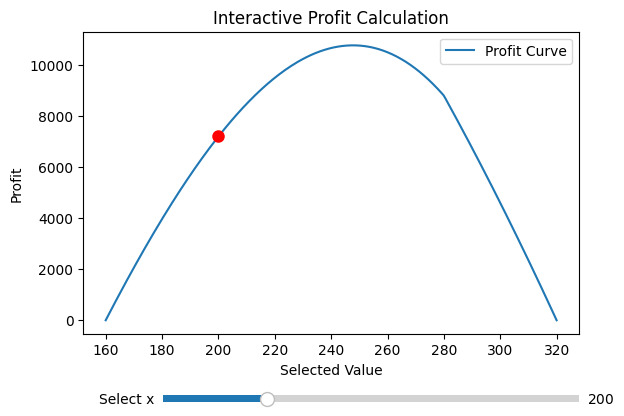

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define the profit function.
def profit(x):
    # Calculate percentage from the population, clamped at 1 (i.e., 100%)
    pct = x - 160
    if pct > 120:
        pct = 120
    pct /= 120
    # Calculate the average price from 160 to x.
    avg_price = (160 + x) / 2
    return avg_price * (320 - x) * pct

# Generate x values and compute profit for the curve.
x = np.linspace(160, 320, 300)
y = np.array([profit(val) for val in x])

# Create the figure and axis.
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
profit_line, = ax.plot(x, y, label='Profit Curve')

# Add a slider to select the x value.
slider_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(slider_ax, 'Select x', 160, 320, valinit=200)

# Plot a marker that indicates the current x value.
marker_line, = ax.plot(200, profit(200), 'ro', markersize=8)

# Display current x value and profit.
info_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.7))

# Update function for slider interaction.
def update(val):
    x_val = slider.val
    current_profit = profit(x_val)
    marker_line.set_data([x_val], [current_profit])
    info_text.set_text(f"x = {x_val:.1f}\nProfit = {current_profit:.2f}")
    fig.canvas.draw_idle()

slider.on_changed(update)

# Labeling the graph.
ax.set_xlabel('Selected Value')
ax.set_ylabel('Profit')
ax.set_title('Interactive Profit Calculation')
ax.legend()

plt.show()


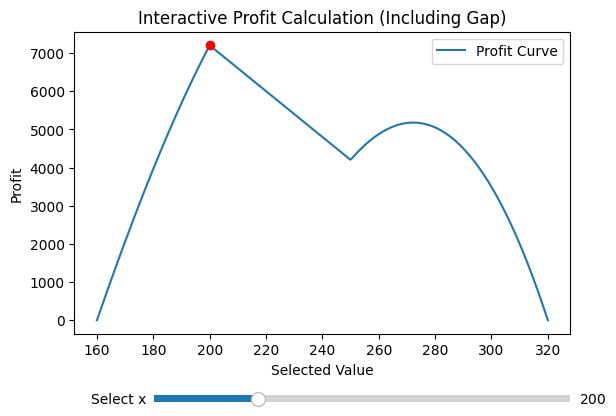

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def profit(x):
    """
    Computes profit based on x (selected value) while accounting for the gap between 200 and 250.
    
    For x between 160 and 200:
      - Average = (160 + x) / 2
      - Population percentage = (x - 160) / 120
    For x in [200, 250):
      - Average remains constant at 180 (the average of 160 and 200)
      - Percentage remains constant at (200-160)/120
    For x in [250, 320]:
      - Active population = 40 (from 160 to 200) + (x - 250) from the second segment
      - Population percentage = (40 + (x - 250)) / 120
      - Average is the weighted average:
            avg = [180 * 40 + ((250 + x)/2) * (x - 250)] / (40 + (x - 250))
    The final profit is:
          profit(x) = average * (320 - x) * (population percentage)
    """
    if x < 160:
        return 0
    elif x <= 200:
        avg = (160 + x) / 2
        pct = (x - 160) / 120
        return avg * (320 - x) * pct
    elif x < 250:
        # In the gap: no extra population beyond 200.
        avg = (160 + 200) / 2  # constant average = 180
        pct = (200 - 160) / 120  # constant percentage = 40/120
        return avg * (320 - x) * pct
    else:  # x between 250 and 320
        active_population = 40 + (x - 250)  # total active population in both segments
        pct = active_population / 120
        # Weighted average:
        avg_first = 180               # average for the first segment (160-200) over weight 40
        avg_second = (250 + x) / 2      # average for the second segment (250 to x)
        avg = (avg_first * 40 + avg_second * (x - 250)) / active_population
        return avg * (320 - x) * pct

# Generate data for plotting.
x_vals = np.linspace(160, 320, 300)
y_vals = np.array([profit(x) for x in x_vals])

# Create the plot.
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
line, = ax.plot(x_vals, y_vals, label='Profit Curve')

# Set initial slider value.
init_x = 200
slider_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
x_slider = Slider(slider_ax, 'Select x', 160, 320, valinit=init_x)

# Plot a marker for the selected value.
marker, = ax.plot(init_x, profit(init_x), 'ro')

# Text annotation for current x value and profit.
info_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.7))

def update(val):
    x_val = x_slider.val
    p_val = profit(x_val)
    marker.set_data([x_val], [p_val])
    info_text.set_text(f"x = {x_val:.1f}\nProfit = {p_val:.2f}")
    fig.canvas.draw_idle()

x_slider.on_changed(update)

ax.set_xlabel('Selected Value')
ax.set_ylabel('Profit')
ax.set_title('Interactive Profit Calculation (Including Gap)')
ax.legend()

plt.show()
